In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import os
import re

In [108]:
#configure figure layout
#Refer to https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html#the-matplotlibrc-file
plt.rcParams['axes.labelsize'] = '22'
plt.rcParams['axes.labelweight'] = '600'
plt.rcParams['axes.titlesize'] = '28'
plt.rcParams['axes.titleweight'] = '600'
plt.rcParams['xtick.labelsize'] = '20'
plt.rcParams['ytick.labelsize'] = '20'
plt.rcParams['figure.subplot.hspace'] = 0.3
plt.rcParams['axes.titlepad'] = 15.0
plt.rcParams['axes.labelpad'] = 10.0
plt.rcParams['legend.fontsize'] = 13.0

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times'] + plt.rcParams['font.serif']



## 27.4

In [11]:
folder = './27.4/log/'
log_list = []

for file in os.listdir(folder):
    if file.endswith(".csv"):
        log_list.append(os.path.join(folder, file))

log_list

['./27.4/log/log_210504.csv',
 './27.4/log/log_210502.csv',
 './27.4/log/log_210429.csv',
 './27.4/log/log_210430.csv',
 './27.4/log/log_210427.csv',
 './27.4/log/log_210509.csv',
 './27.4/log/log_210503.csv',
 './27.4/log/log_210428.csv',
 './27.4/log/log_210505.csv',
 './27.4/log/log_210508.csv',
 './27.4/log/log_210507.csv',
 './27.4/log/log_210506.csv',
 './27.4/log/log_210501.csv']

In [101]:
# Combine log files and format time

#----------------------------------Get a list of files---------------
folder = './27.4/log/'
log_list = []

for file in os.listdir(folder):
    if file.endswith(".csv"):
        log_list.append(os.path.join(folder, file))

#----------------------------------Combine and format time---------------

logs_to_summary = []

for log_name in log_list:
    log = pd.read_csv(log_name)
    date = re.split('/|.csv|_',log_name)[-2]

    new_time_list = []

    for index, row in log.iterrows():
        old_time_format = row[0].split('.')
        new_time_format = str(old_time_format[0]) + ':' + str(old_time_format[1]) + ':' + str(old_time_format[2]) 
        date_format = '20' + str(date[:2]) + '-' + str(date[2:4]) + '-' + str(date[4:6]) + ' ' + new_time_format

        new_time_list.append(date_format)
    
    log['Time'] = new_time_list

    logs_to_summary.append(log)

log_summary = pd.concat(logs_to_summary)

log_summary['Time'] = pd.to_datetime(log_summary["Time"])

,Time(H.M.S),Temp_LM75/oC,Temp_BME680/oC,Temp_NTC/oC,Pressure/kPa,Humidity/%,Time
0,00.00.08,23.46,35.49,33.44,99.22,36.04,2021-05-04 00:00:08
1,00.00.46,23.46,35.48,33.44,99.23,36.11,2021-05-04 00:00:46
2,00.01.19,23.46,35.48,33.44,99.22,36.19,2021-05-04 00:01:19
3,00.01.53,23.46,35.47,33.46,99.22,36.40,2021-05-04 00:01:53
4,00.02.27,23.46,35.45,33.44,99.22,36.20,2021-05-04 00:02:27
5,00.03.01,23.46,35.45,33.44,99.23,36.08,2021-05-04 00:03:01
6,00.03.35,22.96,35.44,33.41,99.21,36.19,2021-05-04 00:03:35
7,00.04.08,23.46,35.44,33.39,99.21,36.36,2021-05-04 00:04:08
8,00.04.42,23.46,35.43,33.33,99.22,36.46,2021-05-04 00:04:42
9,00.05.16,23.46,35.43,33.43,99.21,36.89,2021-05-04 00:05:16


### Make a copy and plot

In [ ]:
df = log_summary.copy()
df["Time"] = pd.to_datetime(df["Time"])
df = df.drop(columns=['Time(H.M.S)'])
df2 = df.melt('Time', var_name='cols',  value_name='vals')

In [141]:
df.to_csv(folder + '/Log.csv')

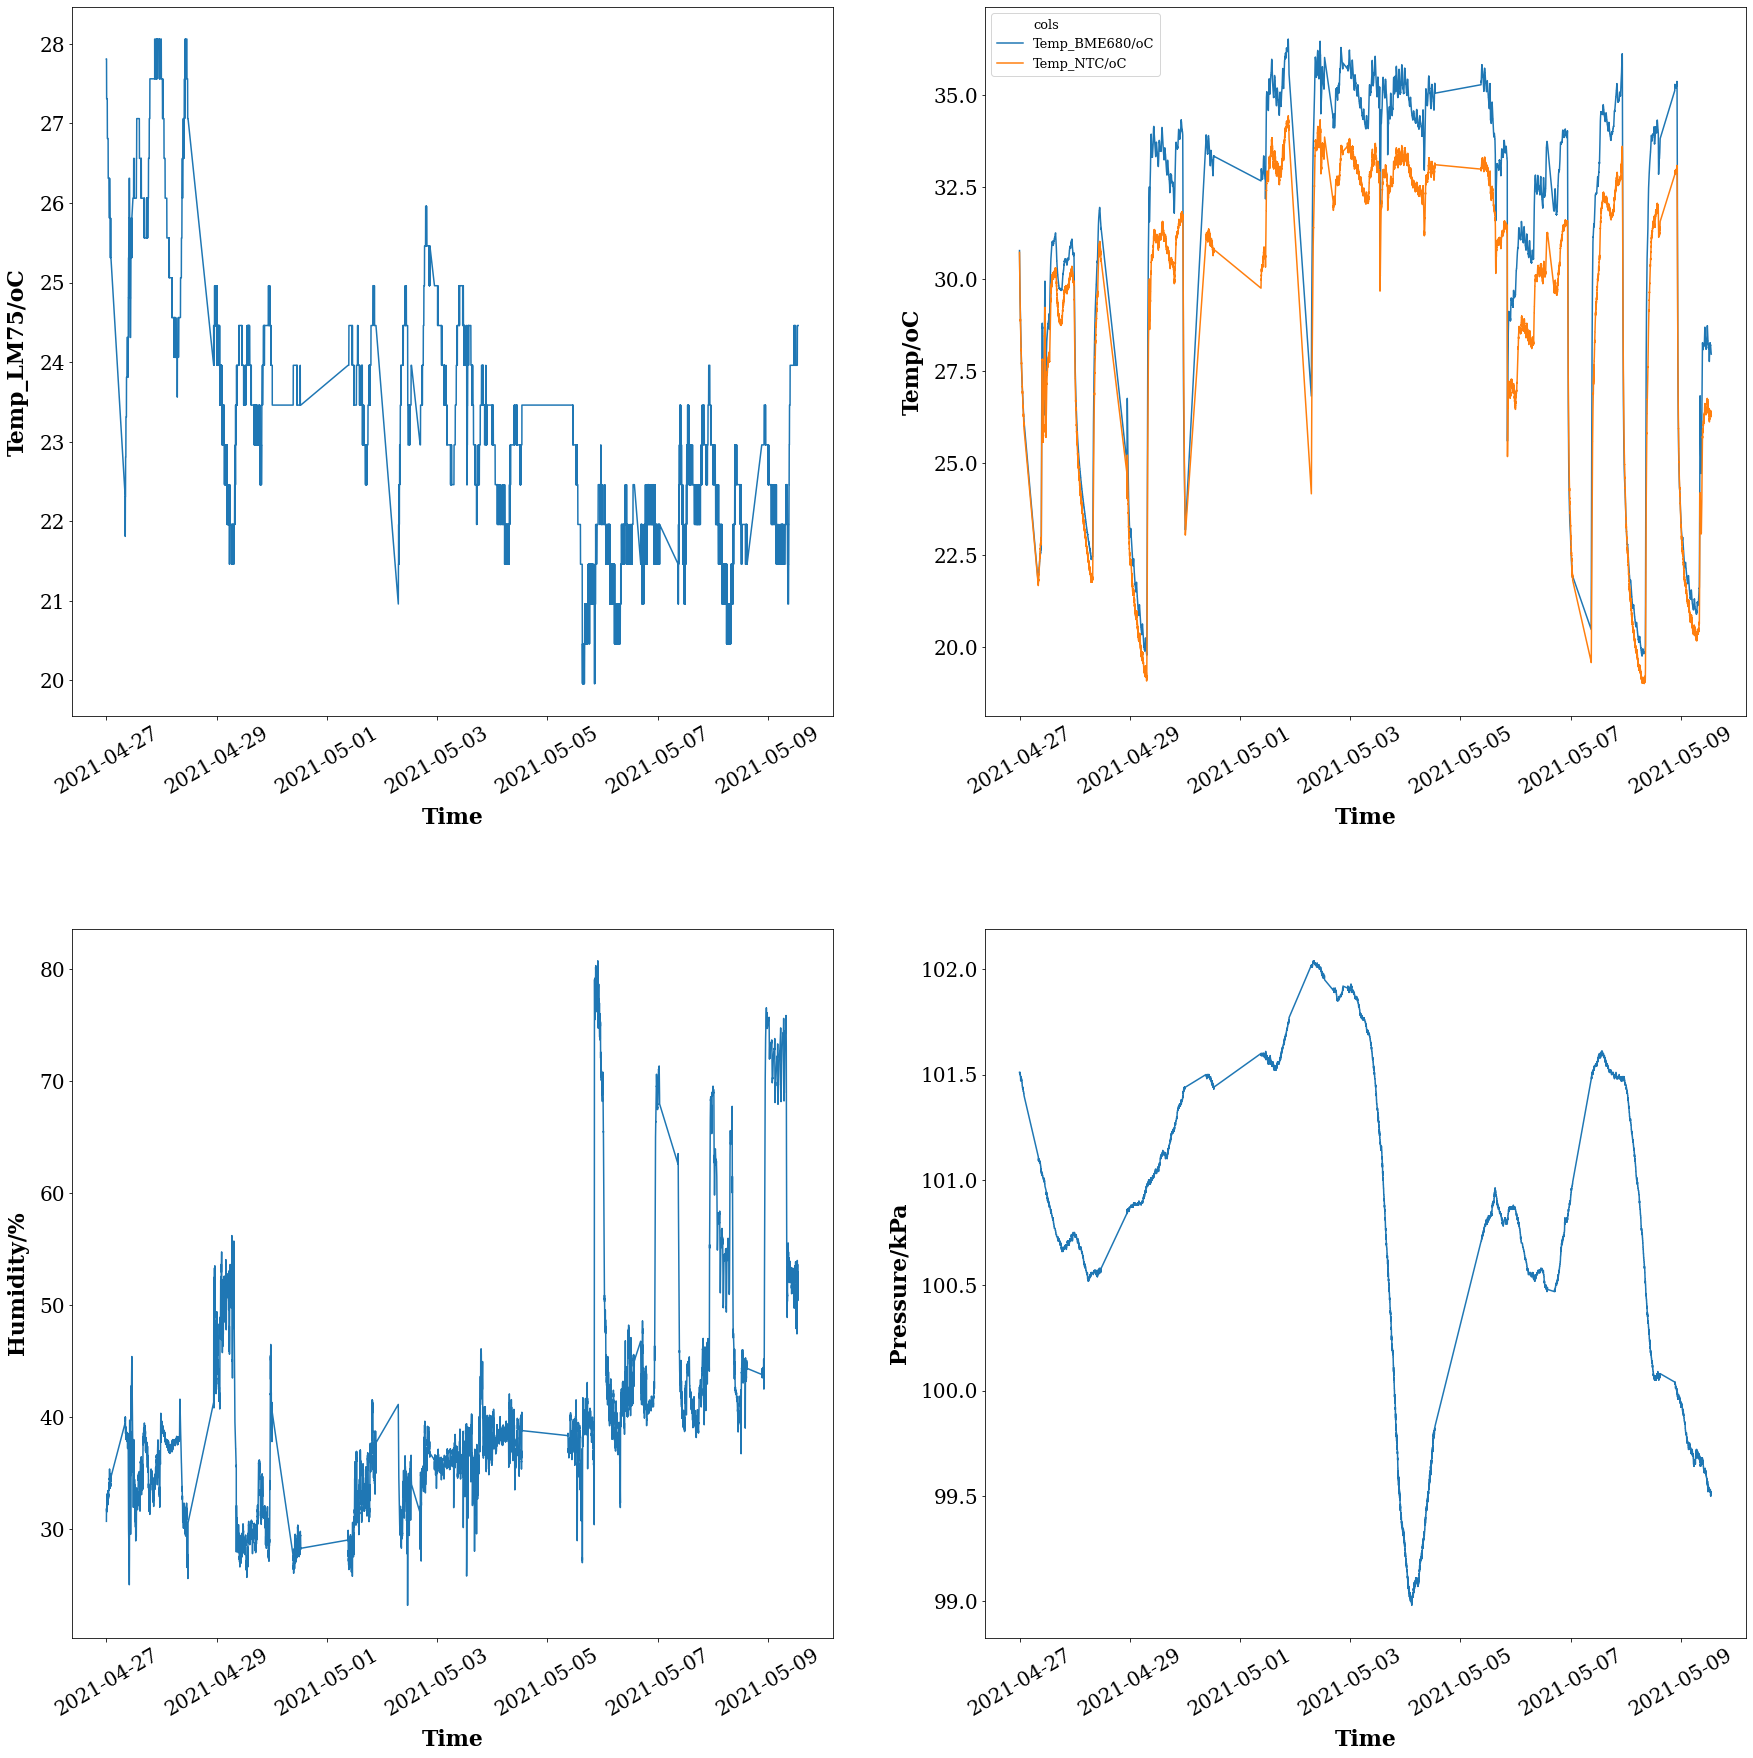

In [140]:
fig, ax = plt.subplots(2,2,figsize = (30,30))

sns.lineplot(x = 'Time', y = 'Temp_LM75/oC', data = df,ax=ax[0,0])

sns.lineplot(x = 'Time', y = 'vals', data = df2[(df2['cols'] == 'Temp_BME680/oC') | (df2['cols'] == 'Temp_NTC/oC')],ax=ax[0,1], hue = 'cols')
ax[0,1].set_ylabel('Temp/oC')

sns.lineplot(x = 'Time', y = 'Humidity/%', data = df,ax=ax[1,0])

sns.lineplot(x = 'Time', y = 'Pressure/kPa', data = df,ax=ax[1,1])

for i in range(2):
    for j in range(2):
        ax[i,j].tick_params(axis='x', labelrotation=30)

plt.savefig(folder + '/LogData.jpg')